RANDOM FOREST 

1. DATA EXPLORATION

In [40]:
import pandas as pd

lung_cancer_detection = pd.read_csv("lung_cancer_detection.csv")
lung_cancer_detection.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [41]:
lung_cancer_detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

2. DATA PREPARATION

In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
lung_cancer_detection['GENDER'] = le.fit_transform(lung_cancer_detection['GENDER'])
lung_cancer_detection['LUNG_CANCER'] = le.fit_transform(lung_cancer_detection['LUNG_CANCER'])

y = lung_cancer_detection['LUNG_CANCER']
x = lung_cancer_detection.drop(columns=['LUNG_CANCER','GENDER'])
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   AGE                    309 non-null    int64
 1   SMOKING                309 non-null    int64
 2   YELLOW_FINGERS         309 non-null    int64
 3   ANXIETY                309 non-null    int64
 4   PEER_PRESSURE          309 non-null    int64
 5   CHRONIC DISEASE        309 non-null    int64
 6   FATIGUE                309 non-null    int64
 7   ALLERGY                309 non-null    int64
 8   WHEEZING               309 non-null    int64
 9   ALCOHOL CONSUMING      309 non-null    int64
 10  COUGHING               309 non-null    int64
 11  SHORTNESS OF BREATH    309 non-null    int64
 12  SWALLOWING DIFFICULTY  309 non-null    int64
 13  CHEST PAIN             309 non-null    int64
dtypes: int64(14)
memory usage: 33.9 KB


In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x,y,
    train_size=0.7,
    stratify=y,
    random_state = 123
)
x_train.shape, x_test.shape

((216, 14), (93, 14))

3. MODEL TRAINING AND EVALUATION

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

rf_classifier = RandomForestClassifier (
    n_estimators = 200,
    max_depth = None,
    min_samples_split = 2,
    min_samples_leaf = 1,
    bootstrap = True,
    random_state = 123
)

rf_classifier.fit(x_train, y_train)

y_pred = rf_classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.8924731182795699

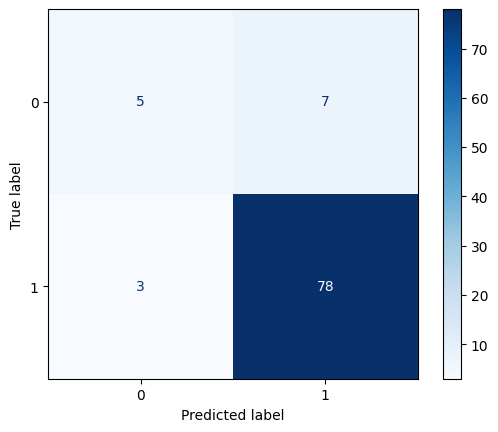

In [45]:
cmatrix = confusion_matrix (y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=rf_classifier.classes_)
disp.plot(cmap='Blues')

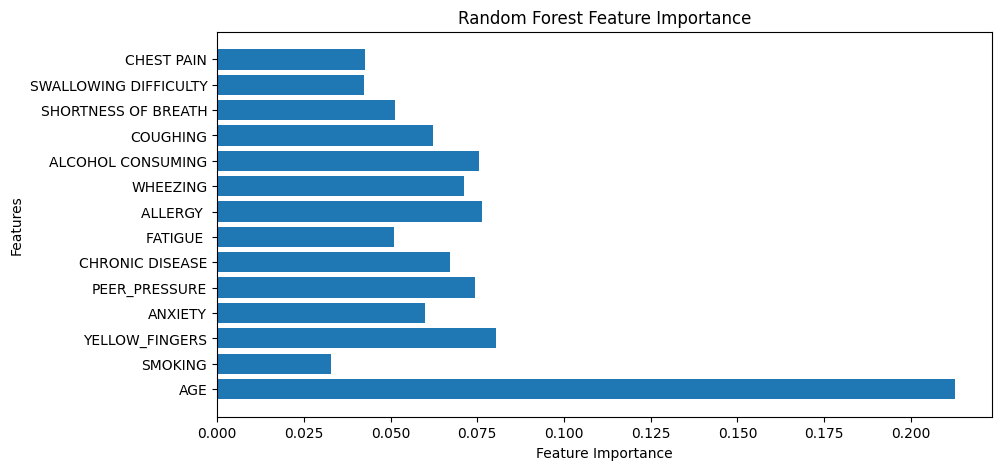

In [46]:
importances = rf_classifier.feature_importances_
plt.figure(figsize=(10,5))
plt.barh(x.columns, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()